# Master Scholar Demo Notebook 1
## Basic Python programming and Data Analysis


Link to exercise notebook: https://colab.research.google.com/drive/1fp80q1IyE0kPNcY-9TFbQgCuU9Kg_f-T?usp=sharing

This notebook introduces the basics of python coding language, some simple math and plot libraries. Later we will move onto pandas, which has a rich data analysis tools available which you can use for your final projects.

--------------------

## 🐍 What is Python?

Python is a **high-level**, **general-purpose** programming language that is:

- ✨ **Easy to read and write** – Looks almost like English  
- 🔁 **Interpreted** – Runs line-by-line (great for beginners!)  
- 🎒 **Versatile** – Used in web development, data science, AI, automation, and more  
- 📚 **Well-supported** – Thousands of libraries to do all the hard work for you

---

## 🔧 Why Learn Python?

Because it's basically the Swiss Army knife of coding:
- Want to build a website? ✅  
- Analyze data and make charts? ✅  
- Write AI models that sound like ChatGPT? ✅  
- Automate boring tasks? ✅

Python is beginner-friendly and industry-approved—used by companies like Google, Netflix, NASA, and even in video games!

---

## 🔤 Syntax? Sounds scary, but it's not.

In other languages, you might write:

```java
public static void main(String[] args){
    System.out.println("Hello World");
}
```
In C
```
int main() {
  printf("Hello, World!\n");
  return 0;
}
```
In python
```
print("Hello World")
```

/tmp/ipython-input-1-1789096091.py:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  gdp = wb.download(country=countries, indicator='NY.GDP.MKTP.CD', start=year, end=year)
/tmp/ipython-input-1-1789096091.py:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  gdp = wb.download(country=countries, indicator='NY.GDP.MKTP.CD', start=year, end=year)
/tmp/ipython-input-1-1789096091.py:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  gdp = wb.download(country=countries, indicator='NY.GDP.MKTP.CD', start=year, end=year)


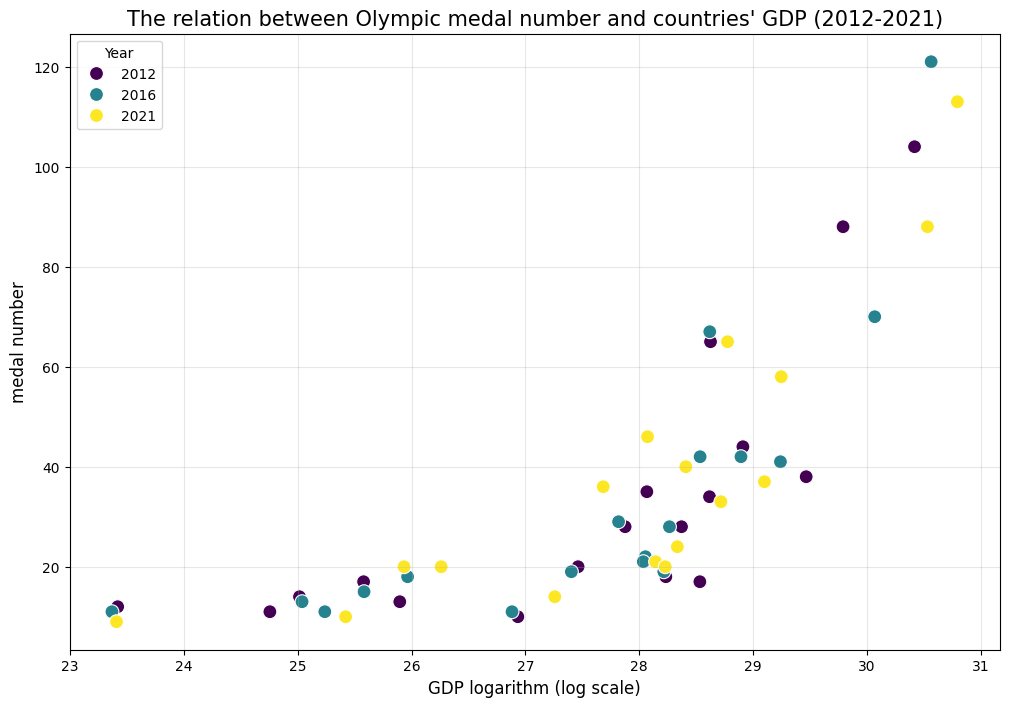

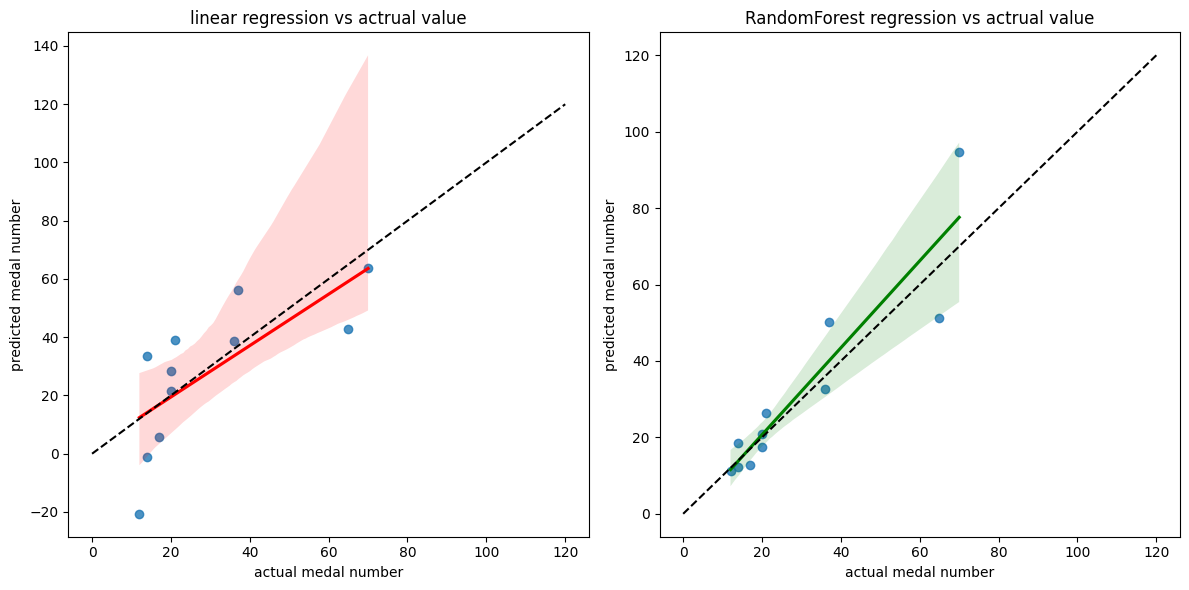

model           MAE        R²         accuracy  
---------------------------------------------
linear regression 14.32      0.2561     24.83%    
RandomForest    6.81       0.7491     80.00%    
\sample prediction result of the countries:
  Country  Predicted_Medals_LR  Predicted_Medals_RF
0     DEU            54.634020                52.80
1     IND            50.108248                46.87
2     BRA            45.562189                20.98


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from pandas_datareader import wb

# 1. medal data
olympic_data = {
    'Country': ['USA', 'CHN', 'JPN', 'GBR', 'AUS',
                'NLD', 'FRA', 'DEU', 'ITA', 'CAN', 'BRA', 'NZL',
                'CUB', 'HUN', 'KOR', 'POL', 'CZE', 'KEN', 'JAM'] * 3,
    'Year': [2012]*19 + [2016]*19 + [2021]*19,
    'Medals': [
        104, 88, 38, 65, 35, 20, 34, 44, 28, 18, 17, 13, 14, 17, 28, 10, 10, 11, 12,
        121, 70, 41, 67, 29, 19, 42, 42, 28, 22, 19, 18, 11, 15, 21, 11, 10, 13, 11,
        113, 88, 58, 65, 46, 36, 33, 37, 40, 24, 21, 20, 15, 20, 20, 14, 11, 10, 9
    ]
}
medals_df = pd.DataFrame(olympic_data)

# 2. gain GDP data
countries = medals_df['Country'].unique().tolist()
gdp_data = []

for year in [2012, 2016, 2021]:
    try:
        gdp = wb.download(country=countries, indicator='NY.GDP.MKTP.CD', start=year, end=year)
        gdp = gdp.reset_index()
        gdp['Year'] = year
        gdp.rename(columns={'NY.GDP.MKTP.CD': 'GDP'}, inplace=True)
        gdp_data.append(gdp)
    except Exception as e:
        print(f"cannot get the GDP data of year{year}:", e)

gdp_df = pd.concat(gdp_data, ignore_index=True)

# **correct country manes**
gdp_df['Country'] = gdp_df['country'].map({
    'United States': 'USA',
    'China': 'CHN',
    'Japan': 'JPN',
    'United Kingdom': 'GBR',
    'Australia': 'AUS',
    'Netherlands': 'NLD',
    'France': 'FRA',
    'Germany': 'DEU',
    'Italy': 'ITA',
    'Canada': 'CAN',
    'Brazil': 'BRA',
    'New Zealand': 'NZL',
    'Cuba': 'CUB',
    'Hungary': 'HUN',
    'Korea, Rep.': 'KOR',
    'Poland': 'POL',
    'Czech Republic': 'CZE',
    'Kenya': 'KEN',
    'Jamaica': 'JAM'
})

# combine data
merged_df = pd.merge(medals_df, gdp_df[['Country', 'Year', 'GDP']], on=['Country', 'Year'], how='inner')
merged_df.dropna(subset=['GDP'], inplace=True)
merged_df['Log_GDP'] = np.log(merged_df['GDP'])

# ✅ check if there are other data
if merged_df.empty:
    raise ValueError("The merged data is empty, which may be caused by the mismatch of GDP country name or year")

# 3. visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Log_GDP', y='Medals', hue='Year', palette='viridis', s=100)
plt.title("The relation between Olympic medal number and countries' GDP (2012-2021)", fontsize=15)
plt.xlabel('GDP logarithm (log scale)', fontsize=12)
plt.ylabel('medal number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 4. build the model
X = merged_df[['Log_GDP', 'Year']]
y = merged_df['Medals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(0, 1 - np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1))))
    return y_pred, mae, r2, accuracy

lr_pred, lr_mae, lr_r2, lr_acc = evaluate_model(lr_model, X_test, y_test)
rf_pred, rf_mae, rf_r2, rf_acc = evaluate_model(rf_model, X_test, y_test)

# 5. visualize the prediction result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=lr_pred, line_kws={'color': 'red'})
plt.title('linear regression vs actrual value')
plt.xlabel('actual medal number')
plt.ylabel('predicted medal number')
plt.plot([0, 120], [0, 120], 'k--')

plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=rf_pred, line_kws={'color': 'green'})
plt.title('RandomForest regression vs actrual value')
plt.xlabel('actual medal number')
plt.ylabel('predicted medal number')
plt.plot([0, 120], [0, 120], 'k--')
plt.tight_layout()
plt.show()

# 6. print the evaluation result
print(f"{'model':<15} {'MAE':<10} {'R²':<10} {'accuracy':<10}")
print("-" * 45)
print(f"{'linear regression':<15} {lr_mae:<10.2f} {lr_r2:<10.4f} {lr_acc:<10.2%}")
print(f"{'RandomForest':<15} {rf_mae:<10.2f} {rf_r2:<10.4f} {rf_acc:<10.2%}")

# 7. show prediction
sample_data = pd.DataFrame({
    'Country': ['DEU', 'IND', 'BRA'],
    'Year': [2021, 2021, 2021],
    'GDP': [3.86e12, 2.66e12, 1.83e12]
})
sample_data['Log_GDP'] = np.log(sample_data['GDP'])
sample_data['Predicted_Medals_LR'] = lr_model.predict(sample_data[['Log_GDP', 'Year']])
sample_data['Predicted_Medals_RF'] = rf_model.predict(sample_data[['Log_GDP', 'Year']])
print("\sample prediction result of the countries:")
print(sample_data[['Country', 'Predicted_Medals_LR', 'Predicted_Medals_RF']])

## Print function and Variables in Pythons

In [ ]:
print("Hello Master Scholars !")
print("Hello World")

print("This is Lecture 2")


Hello Master Scholars !
Hello World
This is Lecture 2


In [ ]:
# ---------------- Variables ------------------------

x = 5   # Assignment

## Comapring x==5
y = 2.5
name = "Bhargavi"
is_student = True

print(x, y, name, is_student)

5 2.5 Bhargavi True


Python has some basic data types:

- `int` → whole numbers (`5`)
- `float` → decimal numbers (`3.14`)
- `str` → text (`"hello"`)
- `bool` → truth values (`True`, `False`)
- `list`, `tuple`, `dict`, `set` → collection types


In [ ]:
a = 10 # Assignment 1
print(a)
print(type(a))

a = 20.5
print(type(a))

10
<class 'int'>
<class 'float'>


In [ ]:
# ----------------- Data Types ----------------------

# Integers, Floats, Strings, Booleans
print(type(x), type(y), type(name), type(is_student))


<class 'int'> <class 'float'> <class 'str'> <class 'bool'>


In [ ]:
# ---------------------- Mixing Datatypes ------------------------

a = 10
b = 3.5
c = "Python"
d = False

print(type(a))  # int
print(type(b))  # float
print(type(c))  # str
print(type(d))  # bool

print(a + b)          # int + float = float
print(c + " is fun")  # str + str = str
print(d + a)          # True is treated like 1 → 1 + 10 = 11

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>
13.5
Python is fun
10


In [ ]:
# When "True" behaves like 1, "False" behaves like 0
print(True + True + False)  # 2

2


In [ ]:
# -------------------------- Difference between an integer number and a string number -------------------------

a = 1
b = "1"
c = "10"

print(type(a))
print(type(b))

print(a + a)
print(b + b)
print(b + c)

<class 'int'>
<class 'str'>
2
11
110


## Lists - Mixing Everything
You can store any combo of types in a list.

In [ ]:
mix = [1, "apple", 3.14, False]
mix1 = ["ball", "bat", "mango", "Apple", "mango", "mango"]

# Indexing: [1, "apple", 3.14, False]
            #  0    1        2    3

print(mix)
print(type(mix[1]))  # str
print(type(mix[3]))  # bool
print(type(mix[0]))

print(type(mix))

print(mix1)

[1, 'apple', 3.14, False]
<class 'str'>
<class 'bool'>
<class 'int'>
<class 'list'>
['ball', 'bat', 'mango', 'Apple', 'mango', 'mango']


## Dictionary - Key Value Pairs

In [ ]:
student = {
    "name": "Alice",
    "age": "16",
    "marks": 92.5,
    "passed": True
}
print(student["name"])
print(student["age"])
print(type(student["marks"]))  # float

print(type(student))


Alice
16
<class 'float'>
<class 'dict'>


## Set - The no duplicates club
No duplicates allowed, order doesn’t matter, and if you try to sneak in the same guest twice, it quietly shrugs and says “Already in.”

In [ ]:
my_set = {1, 2, 3, 4, 4, 5}

my_list = [1 , 2, 3, 4, 4, 5]
print(my_set)

print(my_list)

{1, 2, 3, 4, 5}
[1, 2, 3, 4, 4, 5]


In [ ]:
nums = [1, 2, 2, 3, 3, 3, 2]
unique_nums = set(nums)
print(unique_nums)
print(set(nums))

{1, 2, 3}
{1, 2, 3}


In [ ]:
# ---------------------- Set Operations ------------------------------------

a = {1, 2, 3, 4}
b = {3, 4, 5, 6}

print("Union:", a | b)         # {1, 2, 3, 4, 5, 6}
print("Intersection:", a & b)  # {3, 4}
print("Difference:", a - b)    # {1, 2}

Union: {1, 2, 3, 4, 5, 6}
Intersection: {3, 4}
Difference: {1, 2}


In [ ]:
my_colors = ["red", "green", "blue", "red"]
print(my_colors[3])

colors = {"red", "green", "blue"}
print(colors[0])  # Error! Sets are unordered


red


TypeError: 'set' object is not subscriptable

In [ ]:
for color in colors:
    print(color)


red
blue
green


In [ ]:
print(colors)

{'blue', 'red', 'green'}


## Tuples

A tuple is like a list, but immutable — once created, you can’t change it.

In [ ]:
# Define a tuple

var1 = 10
print(var1)

var1 = 20
print(var1)

coordinates = (4, 7)

print(coordinates[0])  # → 4

# Try changing it (this will error)
coordinates[0] = 10  # TypeError!


10
20
4


TypeError: 'tuple' object does not support item assignment

## Type Casting - Change one type to another

In [ ]:
x = "123"
print(int(x) + 1)     # string to int
print(type(str(45.6)))      # float to string
print(bool(1))        # 0 is False
print(bool())  # non-empty string is True


124
<class 'str'>
True
False


## Control Flow : if, for and while loops

In [ ]:
# if-else
score = 92
if score > 90:
    print("Excellent!")
elif score > 70:
    print("Good job!")
else:
    print("Keep trying!")


Excellent!


In [ ]:
fruits = ["apple", "banana", "cherry", "orange", "banana"]

# for loop
for fruit in fruits:
    print("I like", fruit)

I like apple
I like banana
I like cherry
I like orange
I like banana


In [ ]:
for index in range(0, 5):
  print(fruits[index])

apple
banana
cherry
orange
banana


In [ ]:
# while loop
count = 0
while count < 3:
    print("Count is", count)
    count += 1 # count = count + 1


Count is 0
Count is 1
Count is 2


## `break` and `continue` in loops

`break`: Jumps out of the loop entirely.

`continue`: Skips the rest of the loop body and goes to the next iteration.

In [ ]:
# Use of 'break'

for i in range(10):
    if i == 5:
        break
    print(i)

print("Loop Done")


0
1
2
3
4
Loop Done


In [ ]:
# Use of 'continue'
for i in range(5):
    if i == 2:
        continue
    print(i)


0
1
3
4


## Functions

In [ ]:
def greet(name):
    return f"Hello, {name}!"


x = "Anika"
print(greet(x))
print(greet("Bhargavi"))


person = input()
print(greet(person))


Hello, Anika!
Hello, Bhargavi!
John
Hello, John!


## Recursion (Function calling itself)

Both loops and recursion do the same. But recursion is more elegant.

Lets write a classic factorial function

In [ ]:
def factorial(n):
    if n == 0 or n == 1:
        return 1  # Base case
    return n * factorial(n - 1)  # Recursive call

print(factorial(20))  # → 120


2432902008176640000


In [ ]:
# First atempt: 120
# Second Atempt: 24
# Third Attempt: 6
# 4rth: 2
# 5th: n = 1, factorial(1) = 1

# Math and Plotting

In [ ]:
import math
import numpy as np

print("π is", math.pi)


π is 3.141592653589793


## Common math functions

In [ ]:
print("Square root of 25:", int(math.sqrt(25)))       # 5.0
print("2 to the power of 3:", math.pow(2, 3))     # 8.0
print("Absolute value of -10:", math.fabs(-10))   # 10.0


Square root of 25: 5
2 to the power of 3: 8.0
Absolute value of -10: 10.0


## Rounding things

In [ ]:
print("Floor of 3.7:", math.floor(3.7))  # 3
print("Ceiling of 3.1:", math.ceil(3.1))  # 4
print("Round 4.5 normally:", round(4.5))  # 4 or 5 depending on Python version


Floor of 3.7: 3
Ceiling of 3.1: 4
Round 4.5 normally: 4


## Trigonometry (Radian based)

In [ ]:
angle_deg = 90
angle_rad = math.radians(angle_deg)

print("Sine of 90°:", math.sin(angle_rad))       # 1.0
print("Cosine of 90°:", math.cos(angle_rad))     # close to 0
print("Tangent of 45°:", math.tan(math.radians(45)))  # ~1.0


Sine of 90°: 1.0
Cosine of 90°: 6.123233995736766e-17
Tangent of 45°: 0.9999999999999999


# Ploting with 'matplotlib'

In [ ]:
angles = np.linspace(0, 2*np.pi, 100)
sin_vals = np.sin(angles)

print(angles)
print(sin_vals)


[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

### What does np.linspace(start, stop, num) do?

It creates an array of evenly spaced numbers over a specified interval.

In this case:
```
np.linspace(0, 2*np.pi, 100)
```

Means:

    Start at 0 (0 radians)

    End at 2π radians (≈ 6.28)

    Create 100 numbers between them (including both ends)

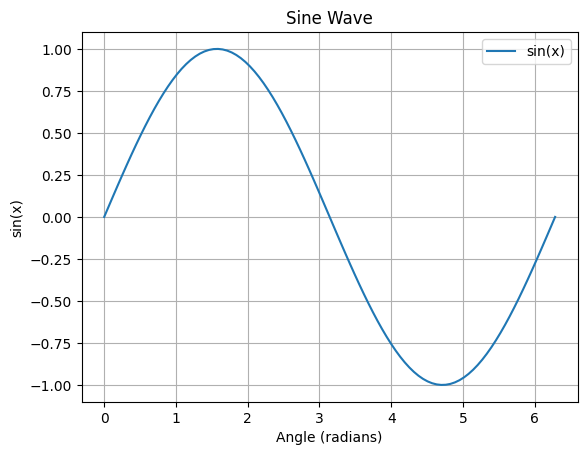

In [ ]:
import matplotlib.pyplot as plt

plt.plot(angles, sin_vals, label='sin(x)')
plt.title("Sine Wave")
plt.xlabel("Angle (radians)")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True)
plt.show()


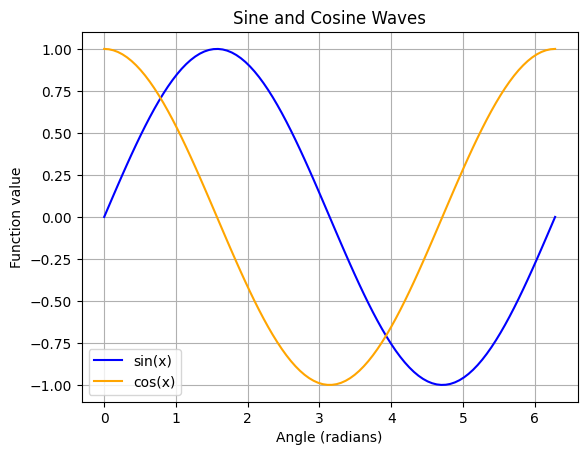

In [ ]:
cos_vals = np.cos(angles)


# Plotting both
plt.plot(angles, sin_vals, label='sin(x)', color='blue')
plt.plot(angles, cos_vals, label='cos(x)', color='orange')

# Add titles and labels
plt.title("Sine and Cosine Waves")
plt.xlabel("Angle (radians)")
plt.ylabel("Function value")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Intro to Pandas - The data wizard

Link to Pandas manual: https://pandas.pydata.org/docs/user_guide/index.html

Pandas is a huge library and this tutorial has only a few functions demonstrated. For more examples, please visit the above link.

## Creating a Data frame

In [ ]:
import pandas as pd

data = {
    "Name": ["Ali", "Ben", "Cleo", "Dia"],
    "Age": [15, 16, 17, 15],
    "Score": [88, 92, 79, 85]
}

df = pd.DataFrame(data)
df


,Name,Age,Score
0,Ali,15,88
1,Ben,16,92
2,Cleo,17,79
3,Dia,15,85


## Basic Data frame operations

In [ ]:
print(df.head())          # First 5 rows
print(df.describe())      # Statistics
print("Mean of Score: ",df["Score"].mean()) # Average score
df[df["Score"] > 85]  # Filter


   Name  Age  Score
0   Ali   15     88
1   Ben   16     92
2  Cleo   17     79
3   Dia   15     85
             Age      Score
count   4.000000   4.000000
mean   15.750000  86.000000
std     0.957427   5.477226
min    15.000000  79.000000
25%    15.000000  83.500000
50%    15.500000  86.500000
75%    16.250000  89.000000
max    17.000000  92.000000
Mean of Score:  86.0


,Name,Age,Score
0,Ali,15,88
1,Ben,16,92


## Adding Columns

In [ ]:
df["Passed"] = df["Score"] > 80
df


,Name,Age,Score,Passed
0,Ali,15,88,True
1,Ben,16,92,True
2,Cleo,17,79,False
3,Dia,15,85,True


## Reading from a CSV file

Most of the data is often stored in '.csv' format. In the above code snippets, we have created the dataset manually to work on. But doing the same thing for huge datasets is impractical and hectic.

So pandas library provides predefined functions such as 'read_csv' which will read the data from a CSV file directly.

Link to the below dataset: https://www.kaggle.com/datasets/yasserh/student-marks-dataset

Note: You need to download the csv file from the above like and upload it here on colab to be able to read the file using pandas

In [ ]:
## Reading from a CSV file

import pandas as pd

# Reading from a CSV file
df = pd.read_csv("Student_Marks.csv")  # Replace with your filename
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
print("Table Info")
print(df.info())
print("--------------------")
print("Table Description")
print(df.describe())
print("--------------------")
print("Table Columns")
print(df.columns)
print("--------------------")
print("Table Shape")
print(df.shape)  # (rows, columns)


Table Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None
--------------------
Table Description
       number_courses  time_study       Marks
count      100.000000  100.000000  100.000000
mean         5.290000    4.077140   24.417690
std          1.799523    2.372914   14.326199
min          3.000000    0.096000    5.609000
25%          4.000000    2.058500   12.633000
50%          5.000000    4.022000   20.059500
75%          7.000000    6.179250   36.676250
max          8.000000    7.957000   55.299000
--------------------
Table Columns
Index(['number_courses', 'time_study', 'Marks'], dtype='object')
--------------------
Table Shape
(100, 3)


## Make changes to the data

In [ ]:
# Rename a column
df.rename(columns={"Marks": "Score"}, inplace=True)

# Add a new column for Pass/Fail
df["Passed"] = df["Score"] >= 50


In [ ]:
df.head()

,number_courses,time_study,Score,Passed
0,3,4.508,19.202,False
1,4,0.096,7.734,False
2,4,3.133,13.811,False
3,6,7.909,53.018,True
4,8,7.811,55.299,True


In [ ]:
def pass_or_fail(score):
    return "Pass" if score >= 50 else "Fail"

df["Passed"] = df["Score"].apply(pass_or_fail)
df.head()

,number_courses,time_study,Score,Passed
0,3,4.508,19.202,Fail
1,4,0.096,7.734,Fail
2,4,3.133,13.811,Fail
3,6,7.909,53.018,Pass
4,8,7.811,55.299,Pass


# Visualize the data

## Histogram of scores

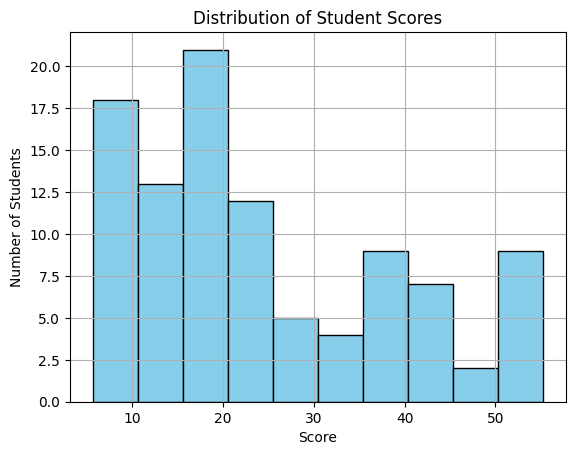

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["Score"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Student Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


## Pass/Fail count

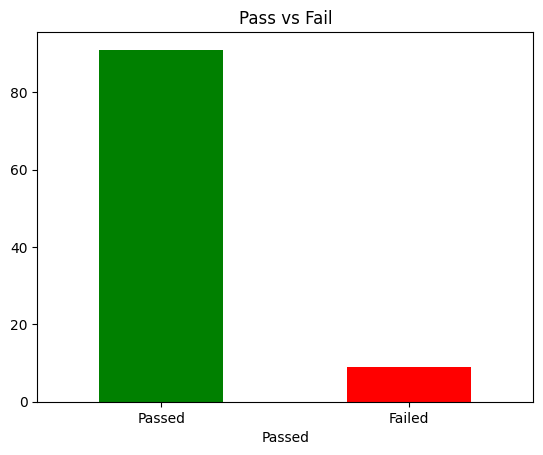

In [ ]:
df["Passed"].value_counts().plot(kind='bar', color=["green", "red"])
plt.title("Pass vs Fail")
plt.xticks([0, 1], ["Passed", "Failed"], rotation=0)
plt.show()


## Save edited file back to CSV

In [ ]:
df.to_csv("students_cleaned.csv", index=False)


# Lets train the data on a ML model and see it's predictions

## Step 1: Load the Data

In [ ]:
# STEP 1: Load the Data
# ---------------------------------------------

import pandas as pd

df = pd.read_csv("Student_Marks.csv")
df.head()


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## STEP 2: Visualize the Data

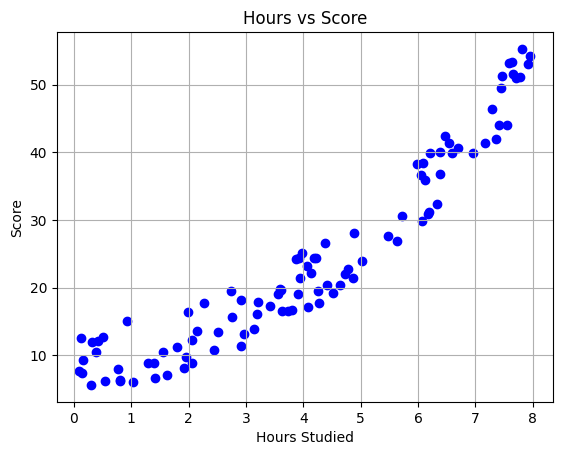

In [ ]:
# STEP 2: Visualize the Data
# -------------------------------------------------

import matplotlib.pyplot as plt

# Scatter Plot
plt.scatter(df["time_study"], df["Marks"], color='blue')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid(True)
plt.show()


**Observation**: The more hours spent on studying --> The more marks you score

## STEP 3: Prepare the Data

In [ ]:
# STEP 3: Prepare the Data

X = df[["time_study"]]  # Features (input) --> Dataframe
y = df["Marks"]    # Target (output) --> [10, 20, 30 ....] = Series

from sklearn.model_selection import train_test_split

# Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data:")
print(X_train.head())
print(y_train.head())

print("\nTesting Data:")
print(X_test.head())
print(y_test.head())


Training Data:
    time_study
55       2.913
88       1.803
26       0.508
42       3.591
69       3.948
55    18.238
88    11.253
26    12.647
42    19.771
69    21.400
Name: Marks, dtype: float64

Testing Data:
    time_study
83       3.197
53       6.049
70       3.736
45       2.061
44       1.954
83    16.106
53    36.653
70    16.606
45     8.924
44     9.742
Name: Marks, dtype: float64


sklearn is a very popular ML library which has hundreds of models. The below link will take your to the user guide of scikit-learn, where all the models available are listed and explained in detail.

Link: https://scikit-learn.org/stable/user_guide.html

## STEP 4: Train a Simple Linear Regression Model

In [ ]:
# STEP 4: Train a Simple Linear Regression Model

from sklearn.linear_model import LinearRegression
# import math

model = LinearRegression()
model.fit(X_train, y_train)

# View the learned equation: y = mx + b
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)


Slope (m): 5.355321531308333
Intercept (b): 2.5155655058073734


## STEP 5: Visualize the Regression Line

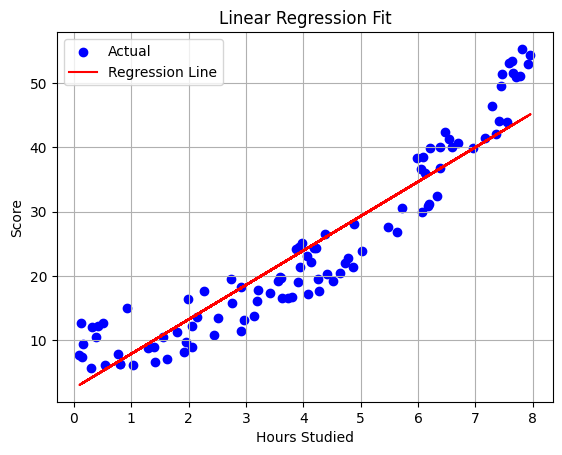

In [ ]:
# STEP 5: Visualize the Regression Line

plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


## STEP 6: Evaluate the Model

In [ ]:
# STEP 6: Evaluate the Model

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Absolute Error: 3.9689515350594236
Mean Squared Error: 25.23674562363223


## STEP 7: Predict Marks for a new input

In [ ]:
# 🔮 STEP 7: Predict Score from New Input

# You can ask the user to enter hours:
hours_studied = float(input("Enter hours studied: "))
predicted_score = model.predict([[hours_studied]])

print(f"Predicted Score: {predicted_score[0]:.2f}")


Enter hours studied: 9
Predicted Score: 50.71


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Let's try a new model: KNN - K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)  # Try 3 neighbors
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

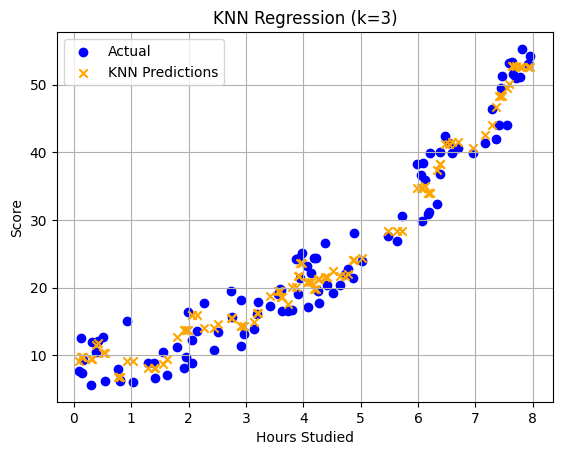

In [ ]:
import matplotlib.pyplot as plt

# Predict across the whole dataset
y_pred = model.predict(X)

plt.scatter(X, y, label="Actual", color='blue')
plt.scatter(X, y_pred, label="KNN Predictions", color='orange', marker='x')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("KNN Regression (k=3)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_test_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))


Mean Absolute Error: 3.0526333333333313
Mean Squared Error: 12.186884733333322


In [ ]:
hours = float(input("Enter hours studied: "))
pred = model.predict([[hours]])

print(f"Predicted score (KNN): {pred[0]:.2f}")


Enter hours studied: 5
Predicted score (KNN): 24.45


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## See which 'k' works the best

In [ ]:
# Try different values of k (number of neighbors)
for k in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_k)
    print(f"k = {k:2d}  |  MAE = {mae:.2f}")

k =  1  |  MAE = 3.59
k =  2  |  MAE = 2.74
k =  3  |  MAE = 3.05
k =  4  |  MAE = 3.23
k =  5  |  MAE = 2.92
k =  6  |  MAE = 2.61
k =  7  |  MAE = 2.59
k =  8  |  MAE = 2.68
k =  9  |  MAE = 3.01
k = 10  |  MAE = 3.16


## Plot MAE vs K

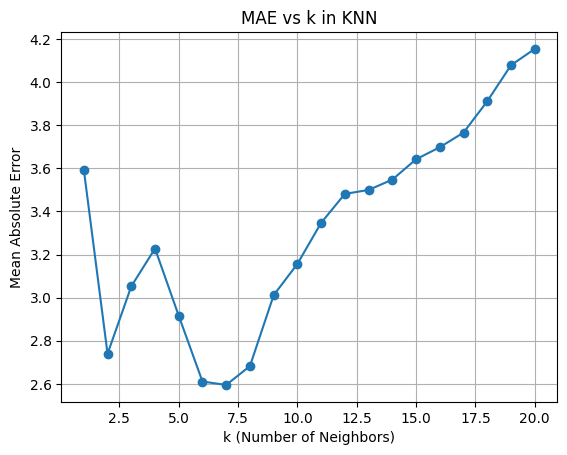

In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
mae_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    mae_scores.append(mean_absolute_error(y_test, y_pred_k))

plt.plot(k_values, mae_scores, marker='o')
plt.title("MAE vs k in KNN")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Mean Absolute Error")
plt.grid(True)
plt.show()
